### Specifying Paths for the data to be loaded

In [1]:
import os

In [29]:
train_path = './gender_dataset_face/Train/'
validate_path = './gender_dataset_face/Validate/'

### Folder Structure
 >  gender_dataset_face 
 -     |  
 -     |->Train  
 - -         |
 - -         |->man
 - -         |->woman
 - -     |
 -     |->Validate
 - -         |
 - -         |->man
 - -         |->woman
 - -     |
 -     |->Test

In [30]:
#Printing the number of files in Train and Validation set

print('Number of images of MAN in Train set:',len(os.listdir(train_path+'man/')))
print('Number of images of WOMAN in Train set:',len(os.listdir(train_path+'woman/')))
print('Number of images of MAN in Validate set:',len(os.listdir(validate_path+'man/')))
print('Number of images of WOMAN in Validate set:',len(os.listdir(validate_path+'woman/')))

Number of images of MAN in Train set: 1071
Number of images of WOMAN in Train set: 1032
Number of images of MAN in Validate set: 100
Number of images of WOMAN in Validate set: 100


### Defining Model

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Activation, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam

Using TensorFlow backend.


In [5]:
IMG_SIZE = 150

model = Sequential(name = 'Gender_classifier')
model.add(Conv2D(16, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

'''model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))'''

model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))


model.add(Dense(1, activation='sigmoid'))



In [6]:
model.summary()

Model: "Gender_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)  

In [7]:
model.compile(loss = 'binary_crossentropy',
             optimizer=Adam(lr=0.0001, decay=0.00002),
             metrics=['accuracy'])

### Training the model

In [8]:
# Creating ImageDataGenerator object for importing the data

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(IMG_SIZE, IMG_SIZE),
                                                   batch_size=64,
                                                   class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validate_path,
                                                   target_size=(IMG_SIZE, IMG_SIZE),
                                                   batch_size=16,
                                                   class_mode='binary')

Found 2103 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
#Training the model and storing results in history file

history = model.fit_generator(train_generator,
                             steps_per_epoch=(1071+1032)//64,
                             epochs=40,
                             validation_data=validation_generator,
                             validation_steps=200//16)

Epoch 1/40
32/32 [==============================] - 20s 629ms/step - loss: 0.6001 - accuracy: 0.6734 - val_loss: 0.6462 - val_accuracy: 0.5052
Epoch 2/40
32/32 [==============================] - 14s 424ms/step - loss: 0.4461 - accuracy: 0.7818 - val_loss: 0.6574 - val_accuracy: 0.6141
Epoch 3/40
32/32 [==============================] - 14s 422ms/step - loss: 0.3444 - accuracy: 0.8470 - val_loss: 0.6130 - val_accuracy: 0.5326
Epoch 4/40
32/32 [==============================] - 14s 423ms/step - loss: 0.3110 - accuracy: 0.8701 - val_loss: 0.6159 - val_accuracy: 0.6793
Epoch 5/40
32/32 [==============================] - 14s 424ms/step - loss: 0.2669 - accuracy: 0.8887 - val_loss: 0.5426 - val_accuracy: 0.7880
Epoch 6/40
32/32 [==============================] - 14s 425ms/step - loss: 0.2306 - accuracy: 0.9014 - val_loss: 0.5008 - val_accuracy: 0.6467
Epoch 7/40
32/32 [==============================] - 13s 417ms/step - loss: 0.1910 - accuracy: 0.9271 - val_loss: 0.6274 - val_accuracy: 0.7500

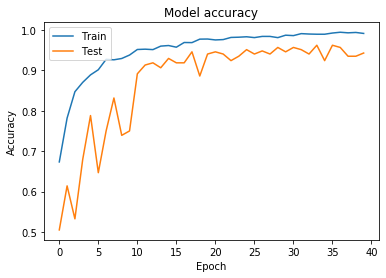

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


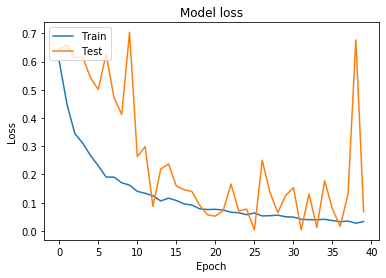

In [12]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
#Saving the model in locally for future use

model.save('3-conv-95.h5')

### Evaluation of model using own data

In [16]:
#loading the saved model
import keras

model = keras.models.load_model('3-conv-95.h5')

In [17]:
#Specifying the path for the test data
import os

test_path = os.path.join('./gender_dataset_face/Test/')

In [28]:
#Loading each image from the folder and feeding it to the model for prediction

import numpy as np
import keras
from keras.preprocessing import image

IMG_SIZE = 150

for fn in os.listdir(test_path):
    img = image.load_img(test_path+fn, target_size=(IMG_SIZE, IMG_SIZE))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=5)
    #print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a woman")
    else:
        print(fn + " is a man")

female1.jpg is a woman
female10.jpg is a woman
female2.jpg is a man
female3.jpg is a woman
female4.jpg is a man
female5.jpg is a man
female6.jpg is a man
female7.jpg is a woman
female8.jpg is a woman
female9.jpg is a woman
man1.jpg is a man
man10.jpg is a man
man2.jpg is a man
man3.jpg is a man
man4.jpg is a man
man5.JPG is a man
man6.jpg is a man
man7.jpg is a man
man8.jpg is a man
man9.jpeg is a man


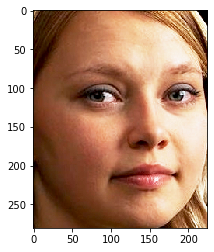

In [27]:
#Plotting the images
import matplotlib.pyplot as plt

img = image.load_img(test_path+'female6.jpg')
plt.imshow(img)
plt.show()